#  <p style="text-align: center;">Modul 1
##  <p style="text-align: center;">Acquire HR Data
### <p style="text-align: center;"> Human Capital Data Science (HCDS)

## Tujuan Pembelajaran

Pada pembelajaran *case study project* bagian ini akan dijelaskan mengenai contoh kasus *Machine Learning* yang menggunakan ***Binary Classsification Algorithm*** menggunakan *Pyhton Programming* yang dipaparkan langkah demi langkah sesuai *machine Learning Process*, yaitu: ***Acquire - Prepare - Analyze - Deploy*** atau dapat disingkat **(APAD)**. 

Dalam pembelajaran ini akan dijelaskan mengenai:
- Bagaimana cara memecahkan masalah Supervised Machine Learning - *Binary Classification Algortihm*.
- Bagaimana melakukan **transformasi data** untuk meningkatkan kinerja algoritma *machine learning* yang digunakan.
- Bagaimana menggunakan ***tuning*** algoritma untuk meningkatkan kinerja algoritma *machine learning* yang digunakan.

# 1.1. Problem Definition

Dalam *Case Study Project* ini akan ditunjukkan mengenai  bagaimana memprediksi kecenderungan karyawan yang akan mengundurkan diri.

Dataset yang digunakan dalam *project predictive employee retention* ini adalah data demography dan kinerja karyawan pada tahun terakhir dari sebuah perusahaan.  

Setelah diperoleh hasil prediksi perilaku retensi karyawan pada setiap departement, sehingga tim *Human Capital Management dan Human Resources Development* dapat mengantisipasi kondisi tersebut ketika terjari, misalnya mempersiapkan regenerasi berikutnya.  

#### Data HR
Dalam Dataset *datahr.csv* terdapat beberapa informasi mengenai: 
- **Kepuasan_kerja**: Tingkat kepuasan karyawan terhadap pekerjaan saat ini. 
- **Evaluasi**: Evaluasi kinerja karyawan di tahun terakhir.  
- **Proyek**: Jumlah proyek yang dikerjakan pada tahun terakhir. 
- **Kerja_bulanan**: Rata-rata jam bekerja karyawan pada tahun terakhir. 
- **Durasi_kerja**: Jumlah tahun bekerja karyawan selama di perusahaan. 
- **Kecelakanaan_kerja**: Jumlah kecelakaan yang dialami oleh karyawan saat bekerja dalam 1 tahun terakhir. 
- **Promosi**: Kejadian Promosi Jabatan kerja pada tahun terakhir.
- **Divisi**: Divisi Kerja karyawan, dengan keterangan tim:
- 1: Sales, 2: Accounting, 3: HR, 4: IT, 5: Manajemen, 6: Marketing, 7: Manajemen Produk, 8: R&D, 9: Support, 10: Technical

- **Gaji**: Kategori gaji karyawan, dengan keterangan sebagai berikut:
1 - Rendah: Gaji di bawah 5 juta per bulan; 
2 - Sedang: Gaji antara 5 - 10 juta per bulan; 
3 - Tinggi: Gaji di atas 10 juta per bulan.

# 1.2. Load Dataset HC 
Dalam project ini akan dilakukan pemuatan dataset *(load dataset)* yang diperlukan dalam proses analisa data pada bagian berikutnya. 
Pemuatan dataset *datahr.csv* dengan menggunakan salah satu fungsi *Panda*, yaitu ***pd.read_csv*** seperti berikut ini: 

In [2]:
# Load Library
import pandas as pd
from pandas import read_csv

# Load dataset
dataset = pd.read_csv("oldRecruitment.csv")
dataset.head()

,jenis_kelamin,umur,asal,penempatan,gaji,pendidikan,IPK,pengalaman,jenis_rekrut,id,status_rekrut
0,1,1,2,2,3,1,3.31,4,2,1,1
1,0,3,19,13,4,0,1.18,5,2,2,0
2,1,1,15,8,5,0,1.59,5,1,3,0
3,1,2,14,14,2,2,3.48,3,2,4,1
4,1,1,21,21,1,1,3.20,1,1,5,1


# 1.3. Summarize Data
Pada bagian ini akan dijelaskan mengenai analisa dari dataset *datahr.csv*. Dalam penggunaan data diperlukan menghindari penggunaan data yang memiliki ciri-ciri ***CISM*** sebagai berikut.

- ***Correlation (C)***: mengukur korelasi linear antara kolom data dan kolom target. Hal ini hanya diperlukan saat mengerjakan project yang bersifat "Prediktif".
- ***ID-ness (I)***: mengukur sejauh mana Atribut ini menyerupai ID. Jumlah nilai yang berbeda untuk Atribut dibagi dengan jumlah baris data.
- ***Stability (S)***: mengukur seberapa stabil atau konstan kolom ini. Jumlah baris dengan nilai non-missing yang paling sering dibagi dengan jumlah total baris data dengan nilai yang tidak hilang.
- ***Missing (M)***: jumlah nilai yang hilang di kolom ini sebagai pecahan dari jumlah total baris data.

Contoh yang perlu diexplore adalah: Correlation, General Trends, dan Outliers. Visualisasi data yang telah dilakukan pada bab sebelumnya, juga diperlukan untuk mempermudah eksplorasi data, seperti penggunaan Histogram, Line Graph, Heat Maps, Scatter Plot, dan Boxplot. Pada umumnya, penghapusan variable sebaiknya pada variable dengan tingkat CISM tertinggi.


## 1.3.1. Descriptive Statistics
Analisa awal dimulai dengan melihat ukuran atau dimensi dataset, yaitu jumlah baris dan kolom.


### Data Dimension
Pada dataset *datahr.csv* terlihat ada 11.990 data karyawan yang memiliki 10 *input variable* termasuk ***target variable Status***. 

In [9]:
# Shape
dataset.shape

(11990, 10)

In [12]:
# Distribusi berdasarkan Gaji
print(dataset.groupby('gaji').size())

gaji
1    5718
2    5229
3    1043
dtype: int64


In [11]:
# Distribution based on Division
print(dataset.groupby('divisi').size())

divisi
1     3262
2      602
3      576
4     2222
5     1785
6      541
7      967
8      722
9      670
10     643
dtype: int64


In [13]:
# Class Distribution Data
print(dataset.groupby('status').size())

status
0    9949
1    2041
dtype: int64


In [14]:
# Data Type
dataset.dtypes

kepuasan_kerja      float64
evaluasi            float64
proyek                int64
kerja_bulanan         int64
durasi_kerja          int64
kecelakaan_kerja      int64
promosi               int64
divisi                int64
gaji                  int64
status                int64
dtype: object

#### Head of Data
Kita dapat melihat secara garis besar mengenai isi dari dataset yang akan dianalisa dengan melihat beberapa baris data pertama. 
Untuk dapat memunculkan beberapa baris data, kita dapat menggunakan command *[nama.dataset].**head**([jumlah.baris])* seperti contoh berikut: 

In [16]:
# Head of Data
dataset.head(10)

,kepuasan_kerja,evaluasi,proyek,kerja_bulanan,durasi_kerja,kecelakaan_kerja,promosi,divisi,gaji,status
0,0.80,0.86,5,262,6,0,0,1,2,1
1,0.11,0.88,7,272,4,0,0,1,2,1
2,0.72,0.87,5,223,5,0,0,1,1,1
3,0.10,0.77,6,247,4,0,0,1,1,1
4,0.92,0.85,5,259,5,0,0,1,1,1
5,0.89,1.00,5,224,5,0,0,1,1,1
6,0.11,0.81,6,305,4,0,0,1,1,1
7,0.84,0.92,4,234,5,0,0,1,1,1
8,0.78,0.99,4,255,6,0,0,1,1,1
9,0.76,0.89,5,262,5,0,0,1,1,1


#### Data Describe
Untuk dapat mengerti data yang akan dianalisa, kita dapat melihat deskripsi dari setiap varible yang ada dalam dataset tersebut. 

Kita dapat menggunakan command *print([nama.dataset].**describe**([jumlah.baris]))* untuk memunculkan beberapa informasi dari setiap variable,  

In [20]:
# Description Data
dataset.describe()

,kepuasan_kerja,evaluasi,proyek,kerja_bulanan,durasi_kerja,kecelakaan_kerja,promosi,divisi,gaji,status
count,11990.00,11990.00,11990.00,11990.00,11990.00,11990.00,11990.00,11990.00,11990.00,11990.00
mean,0.64,0.76,4.16,213.73,3.59,0.15,0.02,4.36,1.61,0.17
std,0.26,0.16,1.10,47.02,1.52,0.36,0.15,2.81,0.64,0.38
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,1.00,1.00,0.00
25%,0.51,0.63,3.00,175.00,3.00,0.00,0.00,1.00,1.00,0.00
50%,0.69,0.78,4.00,220.00,3.00,0.00,0.00,4.00,2.00,0.00
75%,0.84,0.89,5.00,253.00,4.00,0.00,0.00,7.00,2.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,10.00,3.00,1.00


#### Data Correlation
*Data Correlation* dapat membantu kita melihat hubungan antar variable data, sehingga kita dapat memilih variable yang baik digunakan saat mengolah data.

In [21]:
# Load Library
from pandas import set_option

# correlation 
set_option('precision', 2)

dataset.corr(method='pearson')

,kepuasan_kerja,evaluasi,proyek,kerja_bulanan,durasi_kerja,kecelakaan_kerja,promosi,divisi,gaji,status
kepuasan_kerja,1.00,-2.72e-02,-3.96e-01,-0.18,-0.15,3.90e-02,2.30e-02,1.05e-02,2.61e-02,-0.31
evaluasi,-0.03,1.00e+00,5.79e-02,0.10,0.09,-4.21e-02,-1.86e-02,2.79e-03,-5.60e-02,0.32
proyek,-0.40,5.79e-02,1.00e+00,0.17,0.16,-5.61e-02,-2.14e-02,-8.59e-03,-5.67e-02,0.45
kerja_bulanan,-0.18,1.00e-01,1.69e-01,1.00,0.09,-4.65e-02,-1.36e-02,-1.36e-02,-4.06e-02,0.40
durasi_kerja,-0.15,9.15e-02,1.64e-01,0.09,1.00,-1.04e-02,5.70e-02,-1.22e-02,3.42e-02,0.28
kecelakaan_kerja,0.04,-4.21e-02,-5.61e-02,-0.05,-0.01,1.00e+00,4.02e-02,2.13e-02,3.93e-03,-0.13
promosi,0.02,-1.86e-02,-2.14e-02,-0.01,0.06,4.02e-02,1.00e+00,8.09e-03,1.06e-01,-0.06
divisi,0.01,2.79e-03,-8.59e-03,-0.01,-0.01,2.13e-02,8.09e-03,1.00e+00,2.50e-02,-0.03
gaji,0.03,-5.60e-02,-5.67e-02,-0.04,0.03,3.93e-03,1.06e-01,2.50e-02,1.00e+00,-0.14
status,-0.31,3.20e-01,4.45e-01,0.40,0.28,-1.32e-01,-5.78e-02,-3.09e-02,-1.39e-01,1.00


***Correlation*** memberikan indikasi tentang bagaimana perubahan terkait antara dua *variable*. Jika dua variabel berubah ke arah yang sama mereka berkorelasi positif. Jika mereka berubah dalam arah yang berlawanan bersama-sama (satu naik, satu turun), maka mereka berkorelasi negatif. 

*Correlation score* dapat dihitung Anda dapat menghitung korelasi antara setiap pasang variable dan disajikan dalam bentuk matrix (*Correlation Matrix*).

Berdasarkan tabel *Correlation Matrix* tersebut dapat dilihat tentang *variable* mana yang memiliki *correlation* tinggi satu sama lain. 

Hal ini perlu diperhatikan karena algoritma *machine learning* seperti ***linear regression*** dan ***logistic regression*** dapat memiliki kinerja yang buruk jika ada input variable yang sangat berkorelasi dalam data tersebut.

## 1.3.2. Data Visualizations 
### a) Unimodal Data Visualizations
Pada bagian ini akan diperlihatkan visualisasi dari masing-masing *variable* dalam dataset. Visualisasi ini dapat  berguna untuk melihat data dengan berbagai sudut pandang yang dapat membantu memberikan ide terhadap analisa data selanjutnya. 

#### Histogram

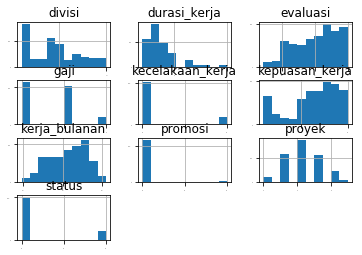

In [18]:
# Load Library
from matplotlib import pyplot

# Histogram
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Pada gambar histogram di atas, terlihat bahwa input variable memiliki distribusi data yang beragam.

#### Density Plots

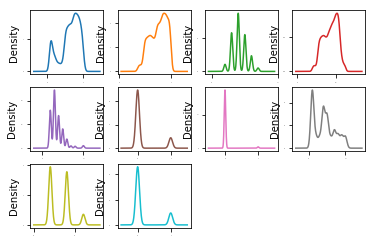

In [22]:
# Load Library
from matplotlib import pyplot

# Univariate Density Plots 
dataset.plot(kind='density', subplots=True, layout=(3,4), sharex=False, legend=False, fontsize=1) 
pyplot.show()

#### Box and Whisker Plots

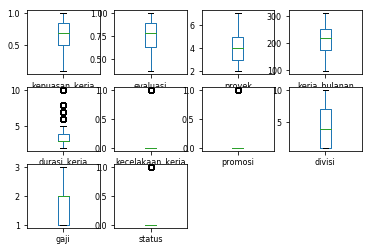

In [13]:
# Load Library
from matplotlib import pyplot

# Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

Box and Whisker Plots dapat membantu menunjukkan data pencilan *(data outlier)* dengan lebih jelas, seperti data ***kepuasan_kerja***.

### b) Multimodal Data Visualizations

***Multimodal Data Visualizations*** merupakan visualisasi interaksi antar variable dalam dataset. Salah satu *Multimodal Data Visualizations* yang terbaik adalah  ***scatter plot matrix***.

#### Scatter Plot Matrix
Variable yang memiliki korelasi tinggi (baik positif maupun negatif), akan terlihat dari kepadatan gambar.

#### Correlation Matrix

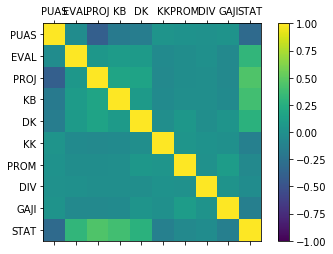

In [16]:
# Load Library
from matplotlib import pyplot
from pandas import read_csv 
import numpy as np

# Load Dataset
dataset = pd.read_csv("datahr.csv")
nama = ['PUAS', 'EVAL', 'PROJ', 'KB', 'DK', 'KK', 'PROM', 'DIV', 'GAJI', 'STAT'] 

# Correlation Matrix Plot 
fig = pyplot.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
ticks = np.arange(0,10,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(nama) 
ax.set_yticklabels(nama) 
pyplot.show()

Warna kuning terang menunjukkan korelasi positif sedangkan warna hijau gelap menunjukkan korelasi negatif. 

Variable dengan warna kuning terang atau hijau gelap dapat menjadi kandidat variable yang perlu dihapus untuk lebih meningkatkan akurasi model nantinya.

#### Idea Summary
Ada beberapa persiapan data yang perlu dilakukan guna meningkatkan akurasi model prediksi di langkah berikutnya. Sejauh ini akan pantas untuk dicoba:

- Feature Selection dan menghapus atribut yang paling berkorelasi tinggi (positif dan negatif).
- Normalisasi dataset untuk mengurangi pengaruh skala yang berbeda.
- Standarisasi dataset untuk mengurangi pengaruh dari distribusi yang berbeda.

Data eskplorasi lain yang mungkin dilakukan adalah *data binning* (***discretization***). Hal ini juga dapat meningkatkan akurasi untuk ***decision tree algorithm***.